### 需求：双均线策略制定
 - 使用tushare包获取某股票的历史行情数据
 - 并切分数据

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./maotai.csv').drop(labels = 'Unnamed: 0',axis=1)
df

,date,open,close,high,low,volume,code
0,2001-08-27,5.392,5.554,5.902,5.132,406318.00,600519
1,2001-08-28,5.467,5.759,5.781,5.407,129647.79,600519
2,2001-08-29,5.777,5.684,5.781,5.640,53252.75,600519
3,2001-08-30,5.668,5.796,5.860,5.624,48013.06,600519
4,2001-08-31,5.804,5.782,5.877,5.749,23231.48,600519
...,...,...,...,...,...,...,...
4632,2021-01-19,2073.110,2009.410,2096.300,2006.850,46345.00,600519
4633,2021-01-20,2008.000,2040.630,2055.490,1982.500,45082.00,600519
4634,2021-01-21,2048.000,2070.000,2090.020,2041.000,38310.00,600519
4635,2021-01-22,2069.000,2079.950,2100.000,2060.100,29248.00,600519


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.set_index('date',inplace=True)
df

,open,close,high,low,volume,code
date,,,,,,
2001-08-27,5.392,5.554,5.902,5.132,406318.00,600519
2001-08-28,5.467,5.759,5.781,5.407,129647.79,600519
2001-08-29,5.777,5.684,5.781,5.640,53252.75,600519
2001-08-30,5.668,5.796,5.860,5.624,48013.06,600519
2001-08-31,5.804,5.782,5.877,5.749,23231.48,600519
...,...,...,...,...,...,...
2021-01-19,2073.110,2009.410,2096.300,2006.850,46345.00,600519
2021-01-20,2008.000,2040.630,2055.490,1982.500,45082.00,600519
2021-01-21,2048.000,2070.000,2090.020,2041.000,38310.00,600519


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4637 entries, 2001-08-27 to 2021-01-25
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    4637 non-null   float64
 1   close   4637 non-null   float64
 2   high    4637 non-null   float64
 3   low     4637 non-null   float64
 4   volume  4637 non-null   float64
 5   code    4637 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 253.6 KB


 ### 计算该股票历史数据的5日均线和30日均线
     - 什么是均线？
         - 对于每一个交易日，都可以计算出前N天的移动平均值，然后将移动平均值连起来，成为一条线，叫做N日移动平均线。
         -移动平均线常用有5天，10天，30天，60天，120天。
         - 5天和10天的短线操作的参照指标，称作日均线指标
         - 30天和60天是中期均线指标，称作季度均线指标
         - 120天和240天是长期均线指标，称作年均线指标
 - 均线的计算方法：MA=（C1+C2+C3...Cn）/N  C：某日收盘价 N：移动平均周期（天数）
     

In [7]:
df

,open,close,high,low,volume,code
date,,,,,,
2001-08-27,5.392,5.554,5.902,5.132,406318.00,600519
2001-08-28,5.467,5.759,5.781,5.407,129647.79,600519
2001-08-29,5.777,5.684,5.781,5.640,53252.75,600519
2001-08-30,5.668,5.796,5.860,5.624,48013.06,600519
2001-08-31,5.804,5.782,5.877,5.749,23231.48,600519
...,...,...,...,...,...,...
2021-01-19,2073.110,2009.410,2096.300,2006.850,46345.00,600519
2021-01-20,2008.000,2040.630,2055.490,1982.500,45082.00,600519
2021-01-21,2048.000,2070.000,2090.020,2041.000,38310.00,600519


In [8]:
#rolling(5)函数：依次取1-5,2-6
ma5 = df['close'].rolling(5).mean()
#rolling(30)函数：依次取1-30,2-31
ma30 = df['close'].rolling(30).mean()

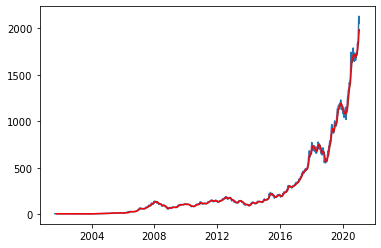

In [9]:
#5日均线=蓝线，30日均线=红线
plt.plot(ma5)
plt.plot(ma30,c='r')
plt.show()

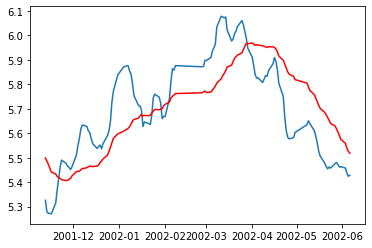

In [10]:
#切分某一段，第50个均线到第180个均线
plt.plot(ma5[50:180])
plt.plot(ma30[50:180],c='r')
plt.show()

### 分析输出所有金叉日期和死叉日期
 - 股票分析技术中的金叉和死叉
  - 分析指标中的两根线，一根为短线时间内的指标线，另一根为较长时间的指标线
  - 如果短时间的指标线方向拐头向上，并且穿过了较长时间的指标线，这种状态叫“金叉”；
  - 如果短时间的指标线方向拐头向下，并且穿过了较长时间的指标线，这种状态叫“死叉”；
  - 一般情况下，出现金叉后，操作趋向买入；死叉趋向卖出。
  - “金叉”“死叉”仅为技术分析手段之一，需要配合其他指标进行使用才能增加准确率

 - 思路①：先找MA5和MA30的交点，此时MA5=MA30
 - 思路②：金叉：在交点前一日MA5＜MA30；在交点后一时点MA5＞MA30
 - 思路③：死叉：在交点前一日MA5＞MA30；在交点后一时点MA5＜MA30

In [11]:
#ma30前30个值都是空值，所以从30开始切分
#保证ma5和ma30的索引（日期）一致
ma5

date
2001-08-27         NaN
2001-08-28         NaN
2001-08-29         NaN
2001-08-30         NaN
2001-08-31       5.715
                ...   
2021-01-19    2090.482
2021-01-20    2065.808
2021-01-21    2053.008
2021-01-22    2052.598
2021-01-25    2074.998
Name: close, Length: 4637, dtype: float64

In [12]:
ma30

date
2001-08-27            NaN
2001-08-28            NaN
2001-08-29            NaN
2001-08-30            NaN
2001-08-31            NaN
                 ...     
2021-01-19    1951.146667
2021-01-20    1957.501000
2021-01-21    1965.167667
2021-01-22    1973.402667
2021-01-25    1985.236000
Name: close, Length: 4637, dtype: float64

In [13]:
ma5 = ma5[30:]
ma30= ma30[30:]

In [14]:
s1 = ma5 < ma30
s2 = ma5 > ma30

In [15]:
#返回布尔值
s1

date
2001-10-15     True
2001-10-16     True
2001-10-17     True
2001-10-18     True
2001-10-19     True
              ...  
2021-01-19    False
2021-01-20    False
2021-01-21    False
2021-01-22    False
2021-01-25    False
Name: close, Length: 4607, dtype: bool

 - S1:T,T,F,F,T 
 - S2：F,F,T,T,F
 - 根据金叉的定义金叉点的定义为左边MA5＜MA30，右边MA30＞MA5，得S1的T→F的那一段
 - 根据死叉的定义金叉点的定义为左边MA5＞MA30，右边MA30＜MA5，得S1的F→T的那一段
 - 寻找方法：将S2向右移动1位。S2.shift（1）→[] ,F,F,T,T,F
 - 重新排列：S1：T,T,F,F,T   S2：[],F,F,T,T,F
 - S1&S2 当T遇到F→F，F遇到F→F，F遇到T→F，T遇到T→T，整理FFTT，找到这段就找到了死叉
 - S1丨S2 当T遇到F→T，F遇到F→F，F遇到T→T，T遇到T→T，整理TFTT，找到这段就找到了金叉

In [16]:
#判定死叉，返回布尔值给death_ex
death_ex = s1 & s2.shift(1)
#死叉对应的行数据并取出索引,df也要从30开始切分
death_date = df[30:].loc[death_ex].index 

In [17]:
#判定金叉，返回布尔值给golden_ex
#金叉对应的行数据并取出索引,df也要从30开始切分
golden_ex = -(s1 | s2.shift(1))
golden_date = df[30:].loc[golden_ex].index

### 如果从2010年1月1日开始，初始资金为100000元，金叉尽量买入，死叉全部卖出，求炒股收益
 - 购买股票的时候，1手股票起买，初始资金会有余数
 - 分析
     - 买卖股票的单价使用开盘价
     - 买股票的时机（金叉），卖股票的时机（死叉）
     - 需要判定最终手里会有剩余的股票没有卖出去
         - 当最后一天为金叉，则买入股票，卖出不来股票
         - 估量剩余股票的的价值计算到总收益
         - 剩余股票的单价=最后一天的收盘价。

In [18]:
s1 = pd.Series(data=1,index=golden_date) #用1作为金叉的标识
s2 = pd.Series(data=0,index=death_date) 
s = s1.append(s2)
s = s.sort_index() #存储金叉和死叉的时间并按时间排序 

In [19]:
s = s['2010':'2020']
s

date
2010-01-20    1
2010-01-22    0
2010-02-03    1
2010-02-26    0
2010-06-04    1
             ..
2020-08-19    1
2020-09-21    0
2020-10-14    1
2020-10-27    0
2020-11-05    1
Length: 117, dtype: int64

In [20]:
first_money = 100000 #设定本金，不变
money = first_money #设定可变量
hold = 0 #持有股数

for i in range(0,len(s)):
    #i = 0(死叉：卖) = 1（金叉：买）
    if s[i] == 1:
        #基于100000的本金尽可能的买入
        #获取股票的单价=p，金叉时对应行数据中的开盘价
        time = s.index[i]
        p = df.loc[time]['open']
        hand_count = money // (p*100)  #使用100000最多买入多少手股票
        hold = hand_count * 100
        
        money -= (hold * p)  #将买股票的钱从money中减去
    else:
        #将买入的股票卖出
        
        #卖出股票的单价
        death_time = s.index[i]
        p_death = df.loc[death_time]['open']
        money += (p_death * hold)  #卖出的股票收入加入到money中
        hold = 0

#如何判定最后一天为金叉或死叉
#直接判定hold是否=0就行了
#hold * 最后一天的收盘价
last_money = hold * df['close'][-1]

#总收益
money + last_money - first_money

2459347.9999999995